# นาย ธภัทร มีชัยธนา รหัส 6402539

# สร้างตัวแปรแล้วทำการ Connect server service ของ MongoDB ที่ทำการ import มาจาก pymongo
# แล้วทำการสร้างตัวแปรที่ใส่ชื่อฐานข้อมูลแล้วเก็บไว้ในตัวแปร และ ใช้ตัวแปรที่เก็บชื่อฐานข้อมูลมากำหนดชื่อของ collection แล้วเก็บในอีกตัวแปรนึง

In [30]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')

mydb = client['6402539_Final']
mycol = mydb['Gun_Deaths_In_America']


# import pandas และ json เพื่อ ใช้ pd ในการอ่านไฟล์ dataset และ ใช้ json ทำการแปลงข้อมูลเป็น json แล้ว insert ข้อมูลที่ถูกแปลงเป็น json ลงไปในตัวแปรที่เก็บข้อมูลฐานข้อมูลเอาไว้

In [7]:
import pandas as pd
import json
df = pd.read_csv('Dataset/gun_deaths.csv')
d_json = json.loads(df.to_json(orient='records'))
mycol.insert_many(d_json)

InsertManyResult([ObjectId('6561688192e0aac6c12c9ba4'), ObjectId('6561688192e0aac6c12c9ba5'), ObjectId('6561688192e0aac6c12c9ba6'), ObjectId('6561688192e0aac6c12c9ba7'), ObjectId('6561688192e0aac6c12c9ba8'), ObjectId('6561688192e0aac6c12c9ba9'), ObjectId('6561688192e0aac6c12c9baa'), ObjectId('6561688192e0aac6c12c9bab'), ObjectId('6561688192e0aac6c12c9bac'), ObjectId('6561688192e0aac6c12c9bad'), ObjectId('6561688192e0aac6c12c9bae'), ObjectId('6561688192e0aac6c12c9baf'), ObjectId('6561688192e0aac6c12c9bb0'), ObjectId('6561688192e0aac6c12c9bb1'), ObjectId('6561688192e0aac6c12c9bb2'), ObjectId('6561688192e0aac6c12c9bb3'), ObjectId('6561688192e0aac6c12c9bb4'), ObjectId('6561688192e0aac6c12c9bb5'), ObjectId('6561688192e0aac6c12c9bb6'), ObjectId('6561688192e0aac6c12c9bb7'), ObjectId('6561688192e0aac6c12c9bb8'), ObjectId('6561688192e0aac6c12c9bb9'), ObjectId('6561688192e0aac6c12c9bba'), ObjectId('6561688192e0aac6c12c9bbb'), ObjectId('6561688192e0aac6c12c9bbc'), ObjectId('6561688192e0aac6c12c9b

# สร้างตัวแปร แล้วเก็บ ค่าจากตัวแปร mycol แล้วใช่ function find หาข้อมูลจาก mycol ที่กำหนด database ไว้อยู่แล้ว มาเก็บไว้ใน ตัวแปร
# พร้อมกับสร้างตัวแปรมาเก็บข้อมูลที่ทำการหา มาแปลงเป็น Dataframe เพื่อเอามาวิเคราห์ พร้อมกับ 
# แล้ว drop column id เพื่อจะเอามา plot graph

In [29]:
mydoc = mycol.find()
data = pd.DataFrame(list(mydoc))
data.drop('_id',axis=1,inplace=True)
data

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100775,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100776,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100777,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100778,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


# ทำการ import seaborn เพื่อ plot graph แบบ histplot
# จาก graph จะโชว์การตายด้วยอาวุธปืนของแต่ละช่วงอายุในอเมริกา

<Axes: xlabel='age', ylabel='Count'>

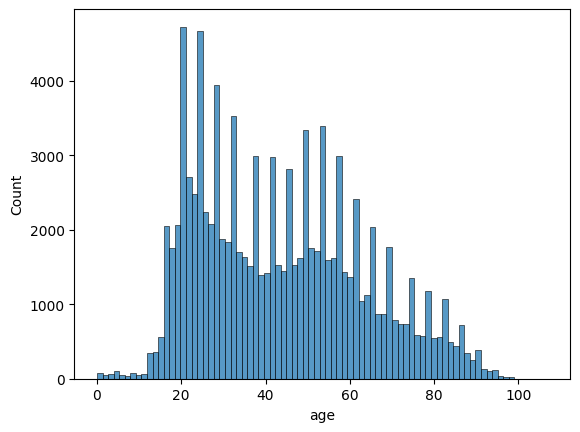

In [28]:
import seaborn as sns
sns.histplot(x=data['age'])